In [6]:
import requests
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
class DomRF_ID_Getter:
    def __init__(self):
        self.offset_=1
        self.limit_=1000
        self.objects = []
    def get_ids(self):
        while True:
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
            res = requests.get(url)
            objects_data = res.json()
            objects_list = objects_data.get('data').get('list')
            self.objects.extend([x.get('objId') for x in objects_list])
            if len(objects_list) == 0:
                break
            self.offset_+= self.limit_
        return self.objects
objects = DomRF_ID_Getter()
objects = objects.get_ids()

In [20]:
len(objects)

10572

In [22]:
class Object_Info_Ex:
    def __init__ (self):
        self.object_info = []
    def load_data (self, objects):
        for i in objects:
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}'
            res = requests.get(url)
            self.object_info.append(res.json())
        return self.object_info
object_info = Object_Info_Ex()
object_info = object_info.load_data(objects)


In [ ]:
df = pd.json_normalize(object_info)
df.head(5)

In [28]:
class Saver:
    def __init__ (self,df):
        self.df = df
    def save_all(self):
        self.df = self.df.applymap(str)
        self.df.to_pickle('project.pkl')
        self.df.to_excel('project_1.xlsx')
        self.df.to_csv('project_2.csv')
        
Saver = Saver(df)
Saver.save_all()

In [9]:
data = pd.read_excel("project_1.xlsx")
data.head(5)

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
0,0,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[['data.developer.devShortCleanNm', 'data.developer.regRegionDesc', 'data.objReady100PercDt', 'data.objElemParkingCnt', 'data.objSquareLiving', 'data.objFlatCnt', 'data.objFloorCnt', 'data.objPriceAvg']]
data.isnull().sum(axis=0)
data_mean_price = data.dropna(subset=['data.objPriceAvg','data.developer.regRegionDesc','data.objReady100PercDt'])
mean_price_region = data.groupby('data.developer.regRegionDesc').mean()
mean_price_region = mean_price_region.sort_values(by='data.objPriceAvg')
mean_price_region = mean_price_region['data.objPriceAvg']
mean_price_region.head(10)

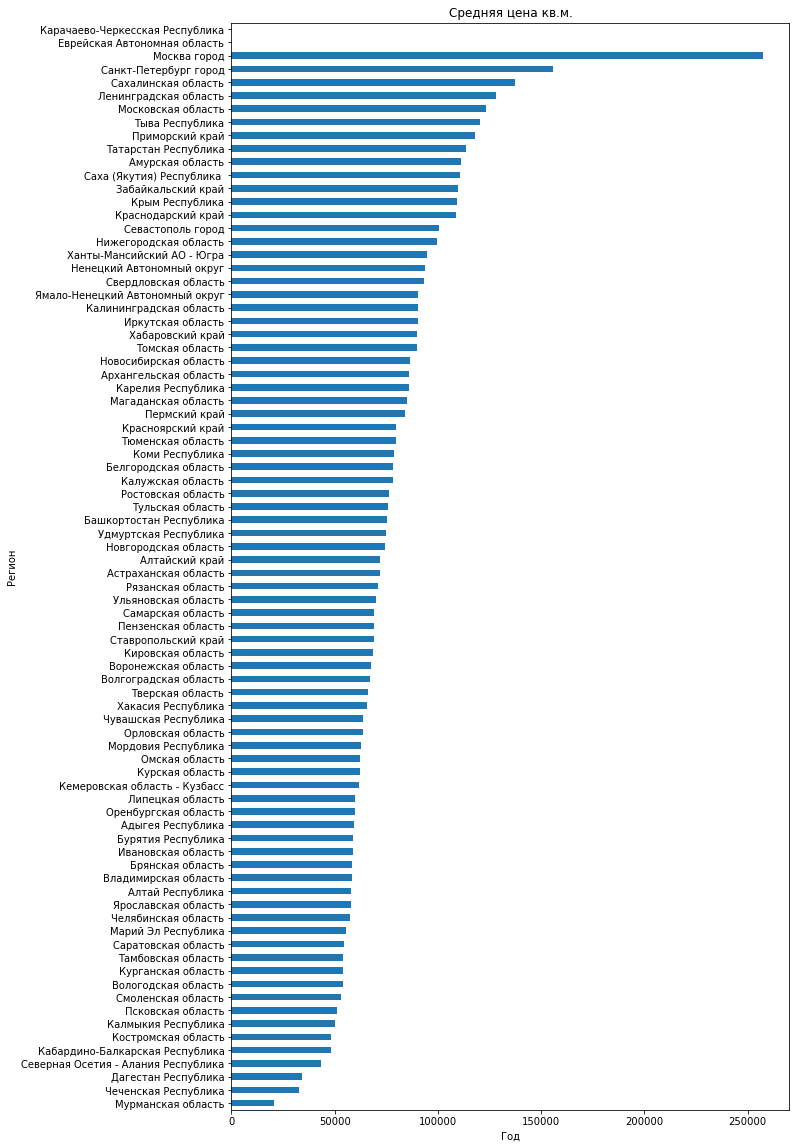

In [17]:
from pylab import rcParams
class Visualizer:
    def __init__ (self, mean_price_region):
        self.mean_price_region = mean_price_region
    def make_plot(self):
        rcParams['figure.figsize'] = 10,20
        mean_price_region.plot(kind='barh')
        plt.title("Средняя цена кв.м.")        
        plt.xlabel("Год")
        plt.ylabel("Регион")
Visualizer = Visualizer(mean_price_region)
Visualizer.make_plot()